# Functional Connectivity
This notebook quantify functional connectivities between different nodes.

It expects preprocessed data in .fif mne format.

It produces a dataframe of functional connectivity. (computing the connectivities between nodes adds another layer to our analysis (in comparison to psds))

# Setup

In [1]:
# Import necessary modules
import mne
import pandas as pd
import numpy as np
import os.path as op
import matplotlib.pyplot as plt
import mne_connectivity
from mne_connectivity import spectral_connectivity
from mne_connectivity.viz import plot_connectivity_circle


# define some useful functions

# FC

In [ ]:
# open data
data_dir = '/Users/yeganeh/Codes/otka-preprocessing/data/Main-study/derivatives/mne-bids-pipeline'
fmin = (4., 8.) # lower limits of the frequency ranges
fmax = (8., 12.) # upper limits of the frequency ranges
subjects = ['01', '02', '03', '26', '27', '28', '29']
tasks = ['baseline1']
con_dict = {}

for n_sub in subjects:
  psd_aggregated = {}
  for task in tasks:
    epoch_name = f'sub-{n_sub}_ses-01_task-{task}_proc-clean_epo.fif'
    dir = op.join(data_dir, f'sub-{n_sub}/ses-01/eeg/{epoch_name}')
    # open clean epochs
    epoch = mne.read_epochs(dir)
    sfreq = epoch.info['sfreq']
    # clculate connectivity
    con = spectral_connectivity(
        epoch, method='pli', sfreq=sfreq, fmin=fmin,
        fmax=fmax, faverage=True, mt_adaptive=True, n_jobs=-1, verbose=0)
    
    con_dict[n_sub+'_'+task] = con

In [259]:
# avraging over the all frequency matrices
freqs = {0:'theta', 1:'alpha'}
avgs = {}

for i in range(2):
    sum =  np.array([0])
    for key in con_dict.keys():
        sum = sum + con_dict[key].get_data(output='dense')[:,:,i]
    
    avgs[freqs[i]] = sum / len(con_dict.keys())

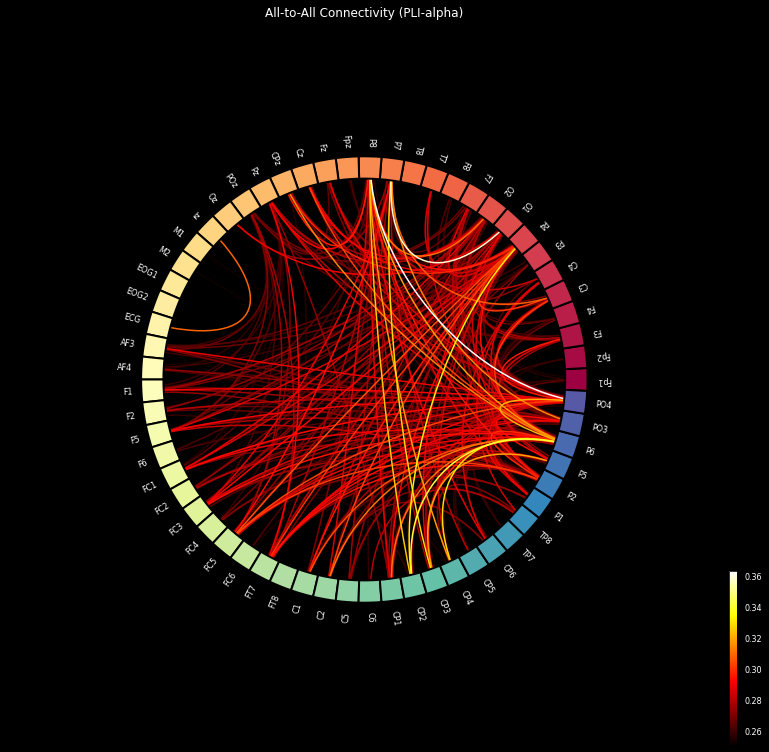

(<Figure size 1152x1152 with 2 Axes>,
 <PolarAxesSubplot:title={'center':'All-to-All Connectivity (PLI-alpha)'}>)

In [268]:
fig = plt.figure(num=None, figsize=(16, 16), facecolor='black')
plot_connectivity_circle(avgs['alpha'], epoch.ch_names, n_lines=300,
                        #  node_angles=node_angles, node_colors=node_colors,
                         title='All-to-All Connectivity (PLI-alpha)', fig=fig)

In [ ]:
fig = plt.figure(num=None, figsize=(16, 16), facecolor='black')
plot_connectivity_circle(avgs['theta'], epoch.ch_names, n_lines=300,
                        #  node_angles=node_angles, node_colors=node_colors,
                         title='All-to-All Connectivity (PLI)', fig=fig)

For replication of previous works:

In high hypnotizable individuals the anterior connectivity decreases, while the posterior connectivity increases.
High hypnotizable participants showed reduced connectivity between frontal-parietal, frontal-central nodes and within frontal cortex however connectivity increased in central-parietal cortex.

The frequency band of these effects were different across studies.

### Represent in graph
In graph theory, networks can be represented as matrices or as graphs. 
MST is a graph that vertices are connected together using a subset of edges, without the construction of any cycles. (MST measures: Degree (k) Number of neighbors of each node, Diameter (d) Longest path between nodes in MST structure, Eccentricity (E) Longest path between each node and any other nodes. Leaf number (L) Number of nodes with a degree of one Radius (R) Minimum value of eccentricity of vertices. Betweenness centrality (BC) Amount of centrality of a node in the graph. Hierarchy (H))




# Graph Neural Network

Deep learning is able to find representations in the data and differentiate between conditions in a way that is not evident from other methods. In particular, "Convolutional neural networks (CNNs) are widely used to recognize the user’s state through electroencephalography (EEG) signals." (Liu et al., 2022)

[review on the emotional recognition and mental workload studies. here I can also review the studies that used GNN to study naturalistic stimuli]

Models's ingredient: Input, output, function, loss

### Significance
- introduce the first GNN model trained on hypnosis data.
- compare training network with raw and preprocessed data.
- find the critical frequency band.

### intrepretations
- what is the "critical frequency band"? in which frequency bands our model has the best performance? "This indicates that lower beta features and relatedad-jacent matrix are valid representations for the emotions of brainas compared to others." [Now, it occured to me that studying psds features alone would not be the best practice (specially when we divide them into different brain areas. what's the meaning of that? Brain neurons are oscillating in specific frequency to send or recieve information, so what we want to know is which brain areas in which frequency bands are transforming information. Knowing the psds alone can gives us some infomation about brain activity during hypnosis, but it won't relate the whole story of the brain functioning during hypnosis which is my end goal in my disseration)]. In the other words, I can only investigate the relevance and importance of psd features by putting them in connectivity framework.

### comparing the psd plot of the raw data with preprocessed data

In [18]:
montage_dir = '/Users/yeganeh/Codes/otka-preprocessing/BC-128.bvef'
pos = mne.channels.read_custom_montage(montage_dir)
raw.set_montage(pos)

/var/folders/pn/qy0qc5tx7t7_97xjmy6pvksc0000gn/T/ipykernel_4706/3033027576.py:3: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(pos)


ValueError: DigMontage is only a subset of info. There are 2 channel positions not present in the DigMontage. The required channels are:

['M1', 'M2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.

Extracting parameters from /Users/yeganeh/Codes/otka-preprocessing/data/Main-study/sub-02/ses-01/eeg/sub-02_ses-01_task-induction1_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 330904  =      0.000 ...   330.904 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 10000 samples (10.000 sec)



/var/folders/pn/qy0qc5tx7t7_97xjmy6pvksc0000gn/T/ipykernel_4706/595868284.py:6: RuntimeWarning: The unit for channel(s) ECG has changed from NA to V.
  raw.set_channel_types({'ECG':'ecg'})


Number of ECG events detected : 367 (average pulse 66 / min.)
Not setting metadata
Not setting metadata
367 matching events found
No baseline correction applied
Loading data for 367 events and 1001 original time points ...
1 bad epochs dropped
Not setting metadata
Not setting metadata
366 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


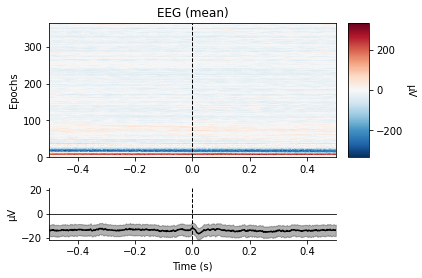

In [11]:
n_sub = '02'
raw_name = f'sub-{n_sub}_ses-01_task-induction1_eeg.vhdr'
data_dir = f'/Users/yeganeh/Codes/otka-preprocessing/data/Main-study/sub-{n_sub}/ses-01/eeg/{raw_name}'

raw = mne.io.read_raw_brainvision(data_dir, eog=('EOG1', 'EOG2'), misc= ['ECG'], preload= True)
raw.set_channel_types({'ECG':'ecg'})
raw.set_eeg_reference(ref_channels=['M1','M2'])

# heartbeat artifact
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw)
# plot event related potentials
ecg_epochs.plot_image(combine='mean')

# new_annot = mne.Annotations(onset=[0],
#                          duration=[333],
#                         description=['baseline'])
# raw.set_annotations(new_annot)
# events, event_dict = mne.events_from_annotations(raw, chunk_duration= 1)
# epochs = mne.Epochs(raw, events, event_dict, preload= True)
# epochs.plot_psd(fmin=0.3, fmax=40, bandwidth=1.43, dB='True', verbose=0)
plt.show()

Using EOG channels: EOG1, EOG2
EOG channel index for this subject is: [26 27]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 16 significant peaks
Number of EOG events detected: 16
Not setting metadata
Not setting metadata
16 matching events found
Applying baseline correction (mode: mean)
Loading data for 16 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
16 

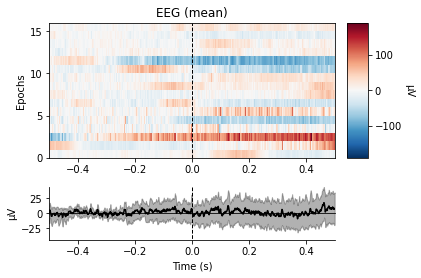

No projector specified for this dataset. Please consider the method self.add_proj.


/var/folders/pn/qy0qc5tx7t7_97xjmy6pvksc0000gn/T/ipykernel_4706/1046557160.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  eog_epochs.average().plot_joint()


RuntimeError: No digitization points found.

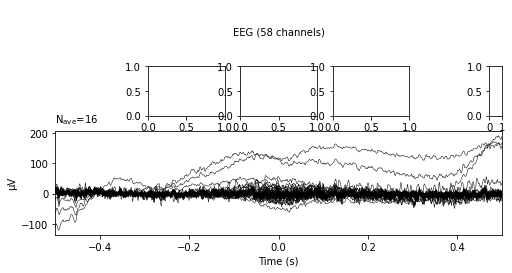

In [15]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2))
eog_epochs.plot_image(combine='mean')
eog_epochs.average().plot_joint()
plt.show()

Reading /Users/yeganeh/Codes/otka-preprocessing/data/Main-study/derivatives/mne-bids-pipeline/sub-02/ses-01/eeg/sub-02_ses-01_task-induction1_proc-clean_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...     500.00 ms
        0 CTF compensation matrices available
Adding metadata with 2 columns
Replacing existing metadata with 2 columns
529 matching events found
No baseline correction applied
0 projection items activated


/var/folders/pn/qy0qc5tx7t7_97xjmy6pvksc0000gn/T/ipykernel_4706/3027961951.py:9: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  epoch.plot_psd(fmin=0.4, fmax=40, bandwidth=2, dB=True, verbose=0)
/var/folders/pn/qy0qc5tx7t7_97xjmy6pvksc0000gn/T/ipykernel_4706/3027961951.py:9: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epoch.plot_psd(fmin=0.4, fmax=40, bandwidth=2, dB=True, verbose=0)


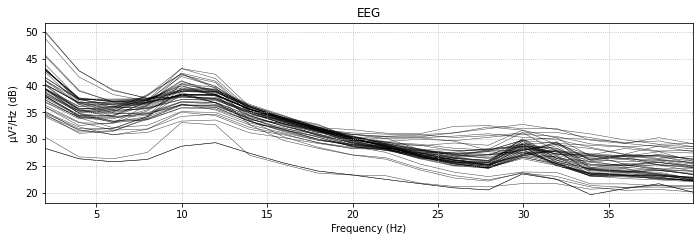

In [6]:
n_sub = '02'
task = 'induction1'
con_dict = {}
data_dir = '/Users/yeganeh/Codes/otka-preprocessing/data/Main-study/derivatives/mne-bids-pipeline'
epoch_name = f'sub-{n_sub}_ses-01_task-{task}_proc-clean_epo.fif'
dir = op.join(data_dir, f'sub-{n_sub}/ses-01/eeg/{epoch_name}')
# open clean epochs
epoch = mne.read_epochs(dir)
epoch.plot_psd(fmin=0.4, fmax=40, bandwidth=2, dB=True, verbose=0)
plt.show()